<a href="https://colab.research.google.com/github/canbethegodfatherofyourlife/RSI-Relative-Strength-Index/blob/main/RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RSI - RELATIVE STRENGTH INDEX**

The RSI is a momentum indicator used to evaluate overbought or oversold conditions in the price of an asset.

It is displayed as an oscillator that can have a reading between 0 to 100.

For swing traders and investors - if in weekly time frame, the RSI goes over 70 it is considered overbought and if it dips below 30 it is considered oversold.



Day Traders prefer to switch to the levels ( 40- 60 ).

If the RSI crosses 60 level with momentum and is backed by the price breaking some support level, it gives bullish divergence. 

If the RSI dips below 40 level and is backed by the price touching some resistance level, it gives bearish divergence.

**CODE**

In [3]:
import numpy as np
import pandas as pd
import talib as ta
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# input
symbol = 'TSLA'
start = '2020-10-01'
end = '2021-10-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,440.760010,448.880005,434.420013,448.160004,448.160004,50741500
2020-10-02,421.390015,439.130005,415.000000,415.089996,415.089996,71430000
2020-10-05,423.350006,433.640015,419.329987,425.679993,425.679993,44722800
2020-10-06,423.790009,428.779999,406.049988,413.980011,413.980011,49146300
2020-10-07,419.869995,429.899994,413.850006,425.299988,425.299988,43127700


In [5]:
n = 14 # Number of period
change = df['Adj Close'].diff(1)
df['Gain'] = change.mask(change<0,0)
df['Loss'] = abs(change.mask(change>0,0))
df['AVG_Gain'] = df.Gain.rolling(n).mean()
df['AVG_Loss'] = df.Loss.rolling(n).mean()
df['RS'] = df['AVG_Gain']/df['AVG_Loss']
df['RSI'] = 100 - (100/(1+df['RS']))

In [6]:
# Simple way to do RSI
import talib as ta

df['RSI_ta'] = ta.RSI(df['Adj Close'], timeperiod=14)
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Gain,Loss,AVG_Gain,AVG_Loss,RS,RSI,RSI_ta
Date,,,,,,,,,,,,,
2020-10-01,440.760010,448.880005,434.420013,448.160004,448.160004,50741500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-02,421.390015,439.130005,415.000000,415.089996,415.089996,71430000,0.000000,33.070007,NaN,NaN,NaN,NaN,NaN
2020-10-05,423.350006,433.640015,419.329987,425.679993,425.679993,44722800,10.589996,0.000000,NaN,NaN,NaN,NaN,NaN
2020-10-06,423.790009,428.779999,406.049988,413.980011,413.980011,49146300,0.000000,11.699982,NaN,NaN,NaN,NaN,NaN
2020-10-07,419.869995,429.899994,413.850006,425.299988,425.299988,43127700,11.319977,0.000000,NaN,NaN,NaN,NaN,NaN
2020-10-08,438.440002,439.000000,425.299988,425.920013,425.920013,40421100,0.620026,0.000000,NaN,NaN,NaN,NaN,NaN
2020-10-09,430.130005,434.589996,426.459991,434.000000,434.000000,28925700,8.079987,0.000000,NaN,NaN,NaN,NaN,NaN
2020-10-12,442.000000,448.739990,438.579987,442.299988,442.299988,38791100,8.299988,0.000000,NaN,NaN,NaN,NaN,NaN
2020-10-13,443.350006,448.890015,436.600006,446.649994,446.649994,34463700,4.350006,0.000000,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Date')

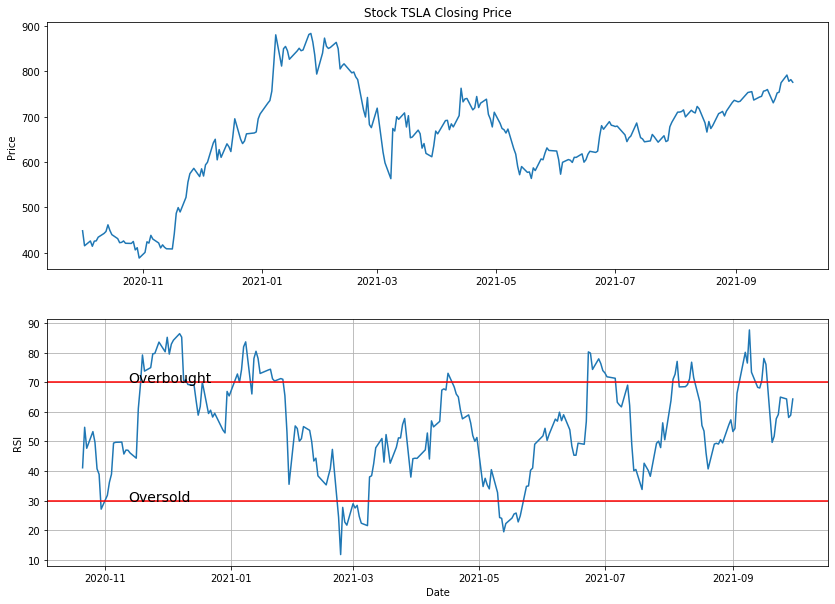

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'], label='Relative Strengths Index')
ax2.text(s='Overbought', x=df.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=30, fontsize=14)
ax2.axhline(y=70, color='red')
ax2.axhline(y=30, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')

**NOTE**

IF U SEE THE INITIAL VALUES MATCH BUT AFTER A COUPLE VALUES, THE RSI_BYTALIB MATCHES THE ACTUAL RSI VALUE BUT THE OTHER ONE DIVERGES

THIS CAN BE ACCOUNTERD FOR SLIGHT MATH ERRORS, EITHER WAYS U CAN USE RSI_BYTALIB FOR ANY USES